In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
train_dataـframe = pd.read_excel("C:/My Files/micromaster/Machine Learning/HW1/data/train.xlsx")
train_df = train_dataـframe.copy(deep=True)
print(train_df.head())

   Price  Age_08_04  Mfg_Month  Mfg_Year      KM Fuel_Type   HP  Met_Color  \
0  10250         53          4      2000  143513    Diesel   69          0   
1   9450         77          4      1998   52900    Petrol  110          1   
2   8950         76          5      1998  120263    Diesel   72          1   
3   9750         70         11      1998   57829    Petrol  110          0   
4   7995         62          7      1999   64797    Petrol  110          1   

   Color  Automatic  ...  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0   Grey          0  ...                0               0      0          0   
1  Green          0  ...                0               1      0          0   
2  Black          0  ...                0               1      0          0   
3   Grey          0  ...                1               1      0          1   
4  Green          0  ...                1               1      0          1   

   Sport_Model  Backseat_Divider  Metallic_Rim  Radio_ca

In [3]:
train_miss_count = train_df.isnull().sum()
print(train_miss_count)

Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64


In [4]:
valid_dataـframe = pd.read_excel("C:/My Files/micromaster/Machine Learning/HW1/data/val.xlsx")
val_df = valid_dataـframe.copy(deep=True)
print(val_df.head())

   Price  Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  \
0  13995         35         10      2001  41000    Petrol  110          1   
1  15750         26          7      2002  43000    Petrol   97          0   
2   9900         57         12      1999  31307    Petrol  110          1   
3  10950         57         12      1999  80470    Petrol  110          0   
4  12950         67          2      1999  58058    Petrol  110          1   

   Color  Automatic  ...  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0   Grey          0  ...                1               1      0          0   
1   Grey          0  ...                1               1      0          0   
2  Green          0  ...                0               1      0          0   
3    Red          0  ...                0               1      0          0   
4  Black          0  ...                1               1      0          1   

   Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette

In [5]:
val_miss_count = val_df.isnull().sum()
print(val_miss_count)

Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64


In [6]:
test_dataـframe = pd.read_excel("C:/My Files/micromaster/Machine Learning/HW1/data/test.xlsx")
test_df = test_dataـframe.copy(deep=True)
print(test_df.head())

   Price  Age_08_04  Mfg_Month  Mfg_Year      KM Fuel_Type   HP  Met_Color  \
0   5950         77          4      1998  145996    Petrol  110          0   
1   9950         58         11      1999  115715    Petrol  110          0   
2   5950         71         10      1998   75085    Petrol   86          0   
3   9950         68          1      1999  119541    Petrol  110          0   
4   6950         65          4      1999  114383    Diesel   90          0   

   Color  Automatic  ...  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0   Grey          0  ...                1               1      0          0   
1   Blue          0  ...                0               1      0          0   
2   Blue          0  ...                0               1      0          0   
3    Red          0  ...                1               1      0          1   
4  White          0  ...                0               1      0          0   

   Sport_Model  Backseat_Divider  Metallic_Rim  Radio_ca

In [7]:
test_miss_count = test_df.isnull().sum()
print(test_miss_count)

Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64


In [8]:
train_target_vlaues = train_df.iloc[:, 0]
train_features = train_df.iloc[:, 1:]
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
train_non_numeric_columns = train_features.select_dtypes(include=['object']).columns
train_features_encoded = encoder.fit_transform(train_features[train_non_numeric_columns])
train_features_encoded_df = pd.DataFrame(train_features_encoded, columns=encoder.get_feature_names_out(train_non_numeric_columns))
train_features_final = pd.concat([train_features.reset_index(drop=True), train_features_encoded_df.reset_index(drop=True)], axis=1)
train_features_final = train_features_final.drop(columns=train_non_numeric_columns)
print(train_features_final.head())

   Age_08_04  Mfg_Month  Mfg_Year      KM   HP  Met_Color  Automatic    CC  \
0         53          4      2000  143513   69          0          0  1900   
1         77          4      1998   52900  110          1          0  1600   
2         76          5      1998  120263   72          1          0  2000   
3         70         11      1998   57829  110          0          0  1600   
4         62          7      1999   64797  110          1          0  1600   

   Doors  Cylinders  ...  Fuel_Type_Petrol  Color_Black  Color_Blue  \
0      5          4  ...               0.0          0.0         0.0   
1      4          4  ...               1.0          0.0         0.0   
2      5          4  ...               0.0          1.0         0.0   
3      3          4  ...               1.0          0.0         0.0   
4      5          4  ...               1.0          0.0         0.0   

   Color_Green  Color_Grey  Color_Red  Color_Silver  Color_Violet  \
0          0.0         1.0        0

In [9]:
val_target_vlaues = val_df.iloc[:, 0]
val_features = val_df.iloc[:, 1:]
val_non_numeric_columns = val_features.select_dtypes(include=['object']).columns
val_features_encoded = encoder.fit_transform(val_features[val_non_numeric_columns])
val_features_encoded_df = pd.DataFrame(val_features_encoded, columns=encoder.get_feature_names_out(val_non_numeric_columns))
val_features_final = pd.concat([val_features.reset_index(drop=True), val_features_encoded_df.reset_index(drop=True)], axis=1)
val_features_final = val_features_final.drop(columns=val_non_numeric_columns)
print(val_features_final.head())

   Age_08_04  Mfg_Month  Mfg_Year     KM   HP  Met_Color  Automatic    CC  \
0         35         10      2001  41000  110          1          0  1600   
1         26          7      2002  43000   97          0          0  1400   
2         57         12      1999  31307  110          1          0  1600   
3         57         12      1999  80470  110          0          0  1600   
4         67          2      1999  58058  110          1          0  1600   

   Doors  Cylinders  ...  Radio_cassette  Parking_Assistant  Tow_Bar  \
0      5          4  ...               0                  0        0   
1      3          4  ...               0                  0        0   
2      5          4  ...               0                  0        0   
3      5          4  ...               0                  0        0   
4      3          4  ...               0                  0        0   

   Fuel_Type_Petrol  Color_Blue  Color_Green  Color_Grey  Color_Red  \
0               1.0         0.0  

In [10]:
test_target_vlaues = test_df.iloc[:, 0]
test_features = test_df.iloc[:, 1:]
test_non_numeric_columns = test_features.select_dtypes(include=['object']).columns
test_features_encoded = encoder.fit_transform(test_features[test_non_numeric_columns])
test_features_encoded_df = pd.DataFrame(test_features_encoded, columns=encoder.get_feature_names_out(test_non_numeric_columns))
test_features_final = pd.concat([test_features.reset_index(drop=True), test_features_encoded_df.reset_index(drop=True)], axis=1)
test_features_final = test_features_final.drop(columns=test_non_numeric_columns)
print(test_features_final.head())

   Age_08_04  Mfg_Month  Mfg_Year      KM   HP  Met_Color  Automatic    CC  \
0         77          4      1998  145996  110          0          0  1600   
1         58         11      1999  115715  110          0          0  1600   
2         71         10      1998   75085   86          0          0  1300   
3         68          1      1999  119541  110          0          0  1600   
4         65          4      1999  114383   90          0          0  2000   

   Doors  Cylinders  ...  Fuel_Type_Diesel  Fuel_Type_Petrol  Color_Blue  \
0      4          4  ...               0.0               1.0         0.0   
1      5          4  ...               0.0               1.0         1.0   
2      5          4  ...               0.0               1.0         1.0   
3      3          4  ...               0.0               1.0         0.0   
4      3          4  ...               1.0               0.0         0.0   

   Color_Green  Color_Grey  Color_Red  Color_Silver  Color_Violet  \
0    

In [11]:
common_columns = train_features_final.columns.intersection(val_features_final.columns).intersection(test_features_final.columns)
train_features_final = train_features_final[common_columns]
val_features_final = val_features_final[common_columns]
test_features_final = test_features_final[common_columns]
print(train_features_final.shape)
print(val_features_final.shape)
print(test_features_final.shape)

(1000, 41)
(136, 41)
(300, 41)


In [ ]:
#train_target_vlaues = train_df.iloc[:, 0]
#train_features = train_df.iloc[:, 1:]
#train_non_numeric_columns = train_features.select_dtypes(include=['object']).columns
#train_features_encoded = pd.get_dummies(train_features, columns=train_non_numeric_columns, drop_first=True)
#train_features_encoded = train_features_encoded.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)
#print(train_features_encoded.head())

In [ ]:
#val_target_vlaues = val_df.iloc[:, 0]
#val_features = val_df.iloc[:, 1:]
#val_non_numeric_columns = val_features.select_dtypes(include=['object']).columns
#val_features_encoded = pd.get_dummies(val_features, columns=val_non_numeric_columns, drop_first=True)
#val_features_encoded = val_features_encoded.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)
#print(val_features_encoded.head())

In [ ]:
#test_target_vlaues = test_df.iloc[:, 0]
#test_features = test_df.iloc[:, 1:]
#test_non_numeric_columns = test_features.select_dtypes(include=['object']).columns
#test_features_encoded = pd.get_dummies(test_features, columns=test_non_numeric_columns, drop_first=True)
#test_features_encoded = test_features_encoded.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)
#print(test_features_encoded.head())

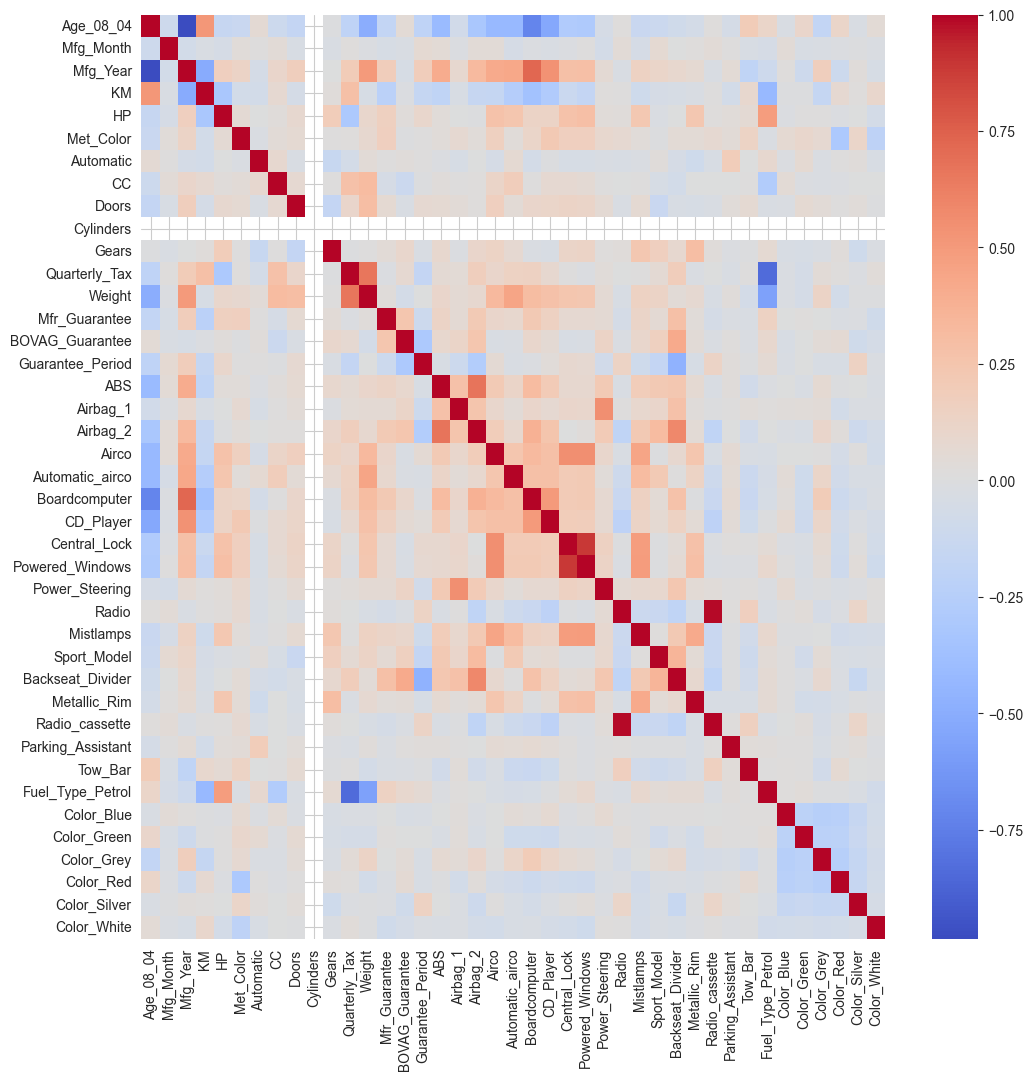

               Mfg_Year  Powered_Windows  Radio_cassette  Fuel_Type_Petrol
Age_08_04     -0.984057              NaN             NaN               NaN
Quarterly_Tax       NaN              NaN             NaN         -0.844243
Central_Lock        NaN         0.883783             NaN               NaN
Radio               NaN              NaN        0.988275               NaN


In [12]:
fetures_correlation_matrix = train_features_final.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(fetures_correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.show()
mask = np.triu(np.ones_like(fetures_correlation_matrix, dtype=bool), k=1)
high_correlation = fetures_correlation_matrix.where(mask)
high_correlation = high_correlation[abs(high_correlation) >= 0.75]
print(high_correlation.dropna(how='all').dropna(axis=1, how='all'))

In [13]:
compare_FPetrol_Tax = [train_target_vlaues.corr(train_features_final['Fuel_Type_Petrol']), train_target_vlaues.corr(train_features_final['Quarterly_Tax'])]
print(f"targets have corr with FPetrol: {compare_FPetrol_Tax[0]:.2f}, with Tax: {compare_FPetrol_Tax[1]:.2f}")
compare_Mfgyear_Age = [train_target_vlaues.corr(train_features_final['Mfg_Year']), train_target_vlaues.corr(train_features_final['Age_08_04'])]
print(f"targets have corr with Mfgyear:{compare_Mfgyear_Age[0]:.2f}, with Age: {compare_Mfgyear_Age[1]:.2f}")
compare_Windows_Lock = [train_target_vlaues.corr(train_features_final['Powered_Windows']), train_target_vlaues.corr(train_features_final['Central_Lock'])]
print(f"targets have corr with Windows:{compare_Windows_Lock[0]:.2f}, with Lock: {compare_Windows_Lock[1]:.2f}")
compare_Radio_Radiocassette = [train_target_vlaues.corr(train_features_final['Radio']), train_target_vlaues.corr(train_features_final['Radio_cassette'])]
print(f"targets have corr with Radio:{compare_Radio_Radiocassette[0]:.2f}, with Radiocassette: {compare_Radio_Radiocassette[1]:.2f}")

targets have corr with FPetrol: -0.05, with Tax: 0.22
targets have corr with Mfgyear:0.88, with Age: -0.88
targets have corr with Windows:0.37, with Lock: 0.34
targets have corr with Radio:-0.05, with Radiocassette: -0.05


In [14]:
train_features_final = train_features_final.drop(columns=['Cylinders','Parking_Assistant', 'Fuel_Type_Petrol', 'Mfg_Year', 'Central_Lock', 'Radio_cassette'])
val_features_final = val_features_final.drop(columns=['Cylinders','Parking_Assistant', 'Fuel_Type_Petrol', 'Mfg_Year', 'Central_Lock', 'Radio_cassette'])
test_features_final = test_features_final.drop(columns=['Cylinders','Parking_Assistant', 'Fuel_Type_Petrol', 'Mfg_Year', 'Central_Lock', 'Radio_cassette'])

In [15]:
train_binary_features = train_features_final[[col for col in train_features_final.columns if set(train_features_final[col].unique()).issubset({0, 1})]]
train_numerical_features = train_features_final[[col for col in train_features_final.columns if col not in train_binary_features]]
scaler = StandardScaler()
train_features_numerical_scaled = scaler.fit_transform(train_numerical_features)
train_features_numerical_scaled = pd.DataFrame(train_features_numerical_scaled, columns=train_numerical_features.columns)
train_features_scaled = pd.concat([train_features_numerical_scaled, train_binary_features], axis=1)
print(train_features_scaled.head())


   Age_08_04  Mfg_Month        KM        HP        CC     Doors     Gears  \
0  -0.131637  -0.438590  2.026466 -2.070604  0.640378  1.020040 -0.131113   
1   1.140221  -0.438590 -0.393506  0.562445  0.033459 -0.030465 -0.131113   
2   1.087227  -0.141442  1.405536 -1.877942  0.842684  1.020040 -0.131113   
3   0.769262   1.641445 -0.261869  0.562445  0.033459 -1.080969 -0.131113   
4   0.345310   0.452854 -0.075777  0.562445  0.033459  1.020040 -0.131113   

   Quarterly_Tax    Weight  Guarantee_Period  ...  Sport_Model  \
0       2.252513  1.227189         -0.258701  ...            0   
1      -1.625129  0.031959         -0.258701  ...            0   
2      -0.573961  1.135249          0.693571  ...            0   
3      -1.625129 -0.427746         -0.258701  ...            0   
4      -0.083416  0.031959         -0.258701  ...            0   

   Backseat_Divider  Metallic_Rim  Tow_Bar  Color_Blue  Color_Green  \
0                 0             0        0         0.0          0.0  

In [16]:
val_binary_features = val_features_final[[col for col in val_features_final.columns if set(val_features_final[col].unique()).issubset({0, 1})]]
val_numerical_features = val_features_final[[col for col in val_features_final.columns if col not in val_binary_features]]
val_features_numerical_scaled = scaler.transform(val_numerical_features)
val_features_numerical_scaled = pd.DataFrame(val_features_numerical_scaled, columns=val_numerical_features.columns)
val_features_scaled = pd.concat([val_features_numerical_scaled, val_binary_features], axis=1)
print(val_features_scaled.head())

   Age_08_04  Mfg_Month        KM        HP        CC     Doors     Gears  \
0  -1.085531   1.344297 -0.711316  0.562445  0.033459  1.020040 -0.131113   
1  -1.562478   0.452854 -0.657902 -0.272424 -0.371153 -1.080969 -0.131113   
2   0.080339   1.938593 -0.970184  0.562445  0.033459  1.020040 -0.131113   
3   0.080339   1.938593  0.342797  0.562445  0.033459  1.020040 -0.131113   
4   0.610280  -1.032886 -0.255753  0.562445  0.033459 -1.080969  4.911681   

   Quarterly_Tax    Weight  Guarantee_Period  ...  Sport_Model  \
0      -0.083416  0.031959         -0.258701  ...            0   
1      -0.083416  0.491663         -0.258701  ...            1   
2      -0.083416 -0.059982         -0.258701  ...            1   
3      -0.083416  0.215840         -0.258701  ...            1   
4      -0.083416 -0.151923         -0.258701  ...            1   

   Backseat_Divider  Metallic_Rim  Tow_Bar  Color_Blue  Color_Green  \
0                 1             0        0         0.0          0.0  

In [17]:
test_binary_features = test_features_final[[col for col in test_features_final.columns if set(test_features_final[col].unique()).issubset({0, 1})]]
test_numerical_features = test_features_final[[col for col in test_features_final.columns if col not in test_binary_features]]
test_features_numerical_scaled = scaler.transform(test_numerical_features)
test_features_numerical_scaled = pd.DataFrame(test_features_numerical_scaled, columns=train_numerical_features.columns)
test_features_scaled = pd.concat([test_features_numerical_scaled, test_binary_features], axis=1)
print(test_features_scaled.head())

   Age_08_04  Mfg_Month        KM        HP        CC     Doors     Gears  \
0   1.140221  -0.438590  2.092779  0.562445  0.033459 -0.030465 -0.131113   
1   0.133333   1.641445  1.284074  0.562445  0.033459  1.020040 -0.131113   
2   0.822257   1.344297  0.198981 -0.978852 -0.573459  1.020040 -0.131113   
3   0.663274  -1.330034  1.386253  0.562445  0.033459 -1.080969 -0.131113   
4   0.504292  -0.438590  1.248500 -0.721969  0.842684 -1.080969 -0.131113   

   Quarterly_Tax    Weight  Guarantee_Period  ...  Sport_Model  \
0      -0.457165 -0.703568         -0.258701  ...            0   
1      -0.083416 -0.059982         -0.258701  ...            0   
2      -0.457165 -0.703568         -0.258701  ...            1   
3      -0.083416 -0.335805         -0.258701  ...            0   
4      -0.573961  3.433769         -0.258701  ...            0   

   Backseat_Divider  Metallic_Rim  Tow_Bar  Color_Blue  Color_Green  \
0                 0             0        0         0.0          0.0  

In [18]:
train_model = SGDRegressor().fit(train_features_scaled, train_target_vlaues)

In [19]:
intercept = train_model.intercept_
print(intercept)
W_coefficients = train_model.coef_
print(W_coefficients)

[7545.03917893]
[-2194.29234327  -297.61683932  -713.4921051    384.7667991
   -22.53808186     3.11580053    56.58187056   310.34910184
   583.70848308   212.63492838   -88.91091729   317.15523559
   251.66527688   823.01717862  -392.16153179  1085.59865781
    34.71934211   157.36743419  2332.7387159   -225.35209451
   142.19325746   345.88744885  1045.24912418  -126.66609826
   109.77707342   343.4613567   -185.49543588   219.60048051
  -215.1808674    472.26267962   126.98554741   543.07193838
   364.02940209   569.77206669  -286.27200885]


In [20]:
train_predictions = train_model.predict(train_features_scaled)
print(train_predictions)

[ 8429.64813954  8113.72648024  6949.75696555 11001.74272803
  9922.24525658  9349.57424137  9772.6450814  17863.30261863
  9415.74875557  7194.10419558 11139.15849672 12702.60717473
  9985.9165903   9619.75348447  8371.57835943  9392.71420785
  5488.78557823 10045.1521958  10739.50736866 11061.86717474
 10386.95734528  8568.38455531 11607.58127101  6803.60834477
 10027.44662927  9117.25411476  7519.53351272  5762.65210257
 10117.39202442  9832.57789419  9579.5796821  11568.8990273
 15253.64121717  6952.69634134 13607.59723763  6497.89300501
 11381.51675708 12799.45356307  7559.27951638  9170.72717407
 10515.5409361  10758.49315618  8135.04990041  9004.73955033
  7973.05146819 10599.62562522  9619.96207746  8267.57898773
  9111.80866566  7900.63974602  8290.06927868  5861.92067089
  8112.65942915  7639.33898806  9387.03789776 13726.22947225
 13111.62968148 10086.85958038 10936.50357861 12260.51156926
 12322.54555364 10737.92847115 10153.18161506  9386.71494643
 11727.97395188 11210.717

In [21]:
train_mse = mean_squared_error(train_target_vlaues, train_predictions)
print(train_mse)
train_r2 = r2_score(train_target_vlaues, train_predictions)
print(train_r2)

1354076.323819135
0.9028179747679467


In [22]:
uncoordinate_train_features_scaled = StandardScaler().fit_transform(train_features_final)
uncoordinate_linear_regression_model = SGDRegressor().fit(uncoordinate_train_features_scaled, train_target_vlaues)
uncoor_predictions = uncoordinate_linear_regression_model.predict(uncoordinate_train_features_scaled)
print(uncoor_predictions)
mse = mean_squared_error(train_target_vlaues, uncoor_predictions)
print(mse)
r2 = r2_score(train_target_vlaues, uncoor_predictions)
print(r2)

[10346.0569204   7802.81944735  6894.42642949 10947.90545222
  9890.47629144  9103.88862073  9799.58334252 18202.1925074
  9322.50241441  7723.79495221 11088.35672659 12706.12195112
  9875.68819762  9578.74122724  8637.87307949  8966.95230861
  5374.61340534 10023.35201049 10412.17038631 11633.82034534
 10268.86892868  8513.95347801 13413.80614534  6571.07384183
  9901.08525342  8853.79171245  7670.05208285  5658.1213989
 10199.59255896  9693.97106408  9494.28951283 11411.85063356
 14967.00421261  6847.01041684 13709.75416119  6080.36047482
 11362.62492108 12725.54550312  7530.89777286  9102.68218152
 10504.85024801 10540.33334998  8334.29416946  9231.17566186
  7900.25726772 10595.29515156  9798.67906782  8066.61457616
  8890.79264401  7622.25217394  8169.53912636  6033.08588557
  8059.32013832  7463.86362204  9301.40650861 13313.08192677
 12967.44636599  9990.68349749 10874.64329378 12240.78484728
 12262.43254468 10876.44492031 10114.38233901  9150.157291
 11901.50451368 11216.093631

In [23]:
learning_rates = [1.0, 0.5, 0.1, 0.01, 0.001]
for i in learning_rates:
    LR_model = SGDRegressor(eta0=i, learning_rate='constant')
    LR_model.fit(train_features_scaled, train_target_vlaues)
    Val_predicts = LR_model.predict(val_features_scaled)
    Val_r2 = r2_score(val_target_vlaues, Val_predicts)
    print(f"for learning rate = {i}, R2 is {Val_r2}")

for learning rate = 1.0, R2 is -9.228577774597001e+18
for learning rate = 0.5, R2 is -2.4438593453675213e+18
for learning rate = 0.1, R2 is -1.5801781086641096e+16
for learning rate = 0.01, R2 is -7155.807405921531
for learning rate = 0.001, R2 is 0.8791946842946746


In [24]:
best_learning_rate = 0.001
Final_LR_model = SGDRegressor(eta0=best_learning_rate, learning_rate='constant')
Final_LR_model.fit(train_features_scaled, train_target_vlaues)
Test_predicts = Final_LR_model.predict(test_features_scaled)
Test_r2 = r2_score(test_target_vlaues, Test_predicts)
print(f"In final model, for learning rate = {best_learning_rate}, R2 is {Test_r2}")

In final model, for learning rate = 0.001, R2 is 0.8817838992805666


In [25]:
class Linear_Regression:
    def __init__(self, feature_set, target_set, learning_rate, iter_number, W_in=None, b_in=0):
        self.feature_set = feature_set
        self.target_set = target_set
        self.learning_rate = learning_rate
        self.iter_number = iter_number
        self.W_in = W_in or np.zeros(self.feature_set.shape[1])
        self.b_in = b_in
        self.scaled_feature_set = self.scale()[1]
        self.scale_mean_std = self.scale()[0]
        self.parameters = self.gradient_descent(self.scaled_feature_set, self.target_set, self.W_in, self.b_in, self.compute_gradient, self.learning_rate, self.iter_number)

    def scale(self):
        binary_features = self.feature_set[[col for col in self.feature_set.columns if set(self.feature_set[col].unique()).issubset({0, 1})]]
        numerical_features = self.feature_set[[col for col in self.feature_set.columns if col not in binary_features]]
        scaled_numerical_features = pd.DataFrame(index=numerical_features.index, columns=numerical_features.columns)
        columns_count = numerical_features.shape[1]
        rows_count = numerical_features.shape[0]
        mean_std = []
        for i in range(columns_count):
            i_mean = np.mean(numerical_features.iloc[:, i])
            i_std = np.std(numerical_features.iloc[:, i])
            mean_std.append((i_mean, i_std))
            for j in range(rows_count):
                scaled_numerical_features.iloc[j, i] = (numerical_features.iloc[j, i] - i_mean) / i_std
        features_scaled = pd.concat([scaled_numerical_features, binary_features], axis=1)
        return (mean_std, features_scaled)

    def compute_gradient(self, X, Y, W, b):
        X = X.to_numpy().astype(np.float64)
        Y = Y.to_numpy()
        m,n = X.shape
        dj_dw = np.zeros((n,))
        dj_db = 0.0
        X[np.isnan(X)] = 0
        for i in range(m):
            err = (np.dot(X[i], W) + b) - Y[i]
            for j in range(n):
                dj_dw[j] = dj_dw[j] + err * X[i][j]
            dj_db = dj_db + err
        dj_dw = dj_dw / m
        dj_db = dj_db / m
        return dj_db, dj_dw

    def gradient_descent(self, X, Y, W_in, b_in, gradient_function, alpha, num_iters):
        W = W_in
        b = b_in
        for i in range(num_iters):
            dj_db,dj_dw = gradient_function(X, Y, W, b)
            W = W - alpha * dj_dw
            b = b - alpha * dj_db
        return (W, b)

    def prediction(self):
        scaled_feature_set = self.scaled_feature_set.to_numpy().astype(np.float64)
        predictions = np.zeros_like(self.target_set)
        scaled_feature_set[np.isnan(scaled_feature_set)] = 0
        for i in range(len(predictions)):
            predictions[i] = np.dot(scaled_feature_set[i], self.parameters[0]) + self.parameters[1]
        return predictions

    def r_squared(self):
        Y_mean = np.mean(self.target_set)
        ss_tot = np.sum((self.target_set - Y_mean) ** 2)
        ss_res = np.sum((self.target_set - self.prediction()) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        return r2


In [26]:
def Val_r2(val_Xset, val_Yset, mean_std, train_parameters):
    binary_features = val_Xset[[col for col in val_Xset.columns if set(val_Xset[col].unique()).issubset({0, 1})]]
    numerical_features = val_Xset[[col for col in val_Xset.columns if col not in binary_features]]
    scaled_numerical_features = pd.DataFrame(index=numerical_features.index, columns=numerical_features.columns)
    columns_count = numerical_features.shape[1]
    rows_count = numerical_features.shape[0]
    for i in range(columns_count):
        for j in range(rows_count):
            scaled_numerical_features.iloc[j, i] = (numerical_features.iloc[j, i] - mean_std[i][0]) / mean_std[i][1]
    features_scaled = pd.concat([scaled_numerical_features, binary_features], axis=1)
    scaled_feature_set = features_scaled.to_numpy().astype(np.float64)
    predictions = np.zeros_like(val_Yset)
    scaled_feature_set[np.isnan(scaled_feature_set)] = 0
    for i in range(len(predictions)):
        predictions[i] = np.dot(scaled_feature_set[i], train_parameters[0]) + train_parameters[1]
    Y_mean = np.mean(val_Yset)
    ss_tot = np.sum((val_Yset - Y_mean) ** 2)
    ss_res = np.sum((val_Yset - predictions) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2


In [28]:
train_manual_model = Linear_Regression(train_features_final, train_target_vlaues, learning_rate=0.01, iter_number=1000)
print(train_manual_model.r_squared())

0.8449088156023181


In [29]:
manual_learning_rates = [1.0, 0.2, 0.02, 0.002]
for i in manual_learning_rates:
    LR_model = Linear_Regression(train_features_final, train_target_vlaues, learning_rate=i, iter_number=1000)
    train_mean_std = LR_model.scale_mean_std
    train_parameters = LR_model.parameters
    try:
        r2 = Val_r2(val_features_final, val_target_vlaues, train_mean_std, train_parameters)
        print(f"for learning rate = {i}, R2 is {r2}")
    except:
        print(f"for learning rate = {i}, R2 is a huge number and incalculable")

C:\Users\Zahra\AppData\Local\Temp\ipykernel_18784\744020685.py:40: RuntimeWarning: overflow encountered in scalar add
  dj_db = dj_db + err
C:\Users\Zahra\AppData\Local\Temp\ipykernel_18784\744020685.py:39: RuntimeWarning: overflow encountered in scalar add
  dj_dw[j] = dj_dw[j] + err * X[i][j]


for learning rate = 1.0, R2 is a huge number and incalculable
for learning rate = 0.2, R2 is 0.8883753665605936
for learning rate = 0.02, R2 is 0.814927411840467
for learning rate = 0.002, R2 is 0.6603926844879264


In [30]:
best_manual_learning_rate = 0.2
Final_manual_LR_model = Linear_Regression(train_features_final, train_target_vlaues, learning_rate=best_manual_learning_rate, iter_number=1000)
Final_train_mean_std = Final_manual_LR_model.scale_mean_std
Final_train_parameters = Final_manual_LR_model.parameters
manual_Test_r2 = Val_r2(test_features_final, test_target_vlaues, Final_train_mean_std, Final_train_parameters)
print(f"In final model, for learning rate = {best_manual_learning_rate}, R2 is {manual_Test_r2}")

In final model, for learning rate = 0.2, R2 is 0.8955895477303046


In [31]:
polynomial_features = PolynomialFeatures(degree=3)
train_numerical_features_poly = pd.DataFrame(polynomial_features.fit_transform(train_numerical_features))
train_features_numerical_poly = pd.DataFrame(train_numerical_features_poly, columns=train_numerical_features_poly.columns)
train_features_poly = pd.concat([train_features_numerical_poly, train_binary_features], axis=1)
train_X_poly = train_features_poly
train_X_poly = train_X_poly.to_numpy().astype(np.float64)
train_X_poly[np.isnan(train_X_poly)] = 0
train_X_poly_df = pd.DataFrame(train_X_poly)

In [32]:
val_numerical_features_poly = pd.DataFrame(polynomial_features.fit_transform(val_numerical_features))
val_features_numerical_poly = pd.DataFrame(val_numerical_features_poly, columns=val_numerical_features_poly.columns)
val_features_poly = pd.concat([val_features_numerical_poly, val_binary_features], axis=1)
val_X_poly = val_features_poly
val_X_poly = val_X_poly.to_numpy().astype(np.float64)
val_X_poly[np.isnan(val_X_poly)] = 0
val_X_poly_df = pd.DataFrame(val_X_poly)

In [33]:
test_numerical_features_poly = pd.DataFrame(polynomial_features.fit_transform(test_numerical_features))
test_features_numerical_poly = pd.DataFrame(test_numerical_features_poly, columns=test_numerical_features_poly.columns)
test_features_poly = pd.concat([test_features_numerical_poly, test_binary_features], axis=1)
test_X_poly = test_features_poly
test_X_poly = test_X_poly.to_numpy().astype(np.float64)
test_X_poly[np.isnan(test_X_poly)] = 0
test_X_poly_df = pd.DataFrame(test_X_poly)

In [35]:
train_manual_Xpoly = Linear_Regression(train_X_poly_df, train_target_vlaues, learning_rate=0.01, iter_number=1000)
print(train_manual_Xpoly.r_squared())

0.9039381053489096


In [41]:
poly_manual_learning_rates = [1.0, 0.1, 0.01, 0.001]
for i in poly_manual_learning_rates:
    poly_LR_model = Linear_Regression(train_X_poly_df, train_target_vlaues, learning_rate=i, iter_number=1000)
    train_mean_std = poly_LR_model.scale_mean_std
    train_parameters = poly_LR_model.parameters
    try:
        r2 = Val_r2(val_X_poly_df, val_target_vlaues, train_mean_std, train_parameters)
        print(f"for learning rate = {i}, R2 is {r2}")
    except:
        print(f"for learning rate = {i}, R2 is a huge number and incalculable")

C:\Users\Zahra\AppData\Local\Temp\ipykernel_18784\744020685.py:39: RuntimeWarning: overflow encountered in scalar add
  dj_dw[j] = dj_dw[j] + err * X[i][j]


for learning rate = 1.0, R2 is a huge number and incalculable


C:\Users\Zahra\AppData\Local\Temp\ipykernel_18784\744020685.py:39: RuntimeWarning: overflow encountered in scalar add
  dj_dw[j] = dj_dw[j] + err * X[i][j]
C:\Users\Zahra\AppData\Local\Temp\ipykernel_18784\744020685.py:39: RuntimeWarning: invalid value encountered in scalar multiply
  dj_dw[j] = dj_dw[j] + err * X[i][j]


for learning rate = 0.1, R2 is a huge number and incalculable
for learning rate = 0.01, R2 is 0.8371795412197027
for learning rate = 0.001, R2 is 0.7434922882641032


In [42]:
best_manual_poly_learning_rate = 0.01
Final_manual_poly_LR_model = Linear_Regression(train_X_poly_df, train_target_vlaues, learning_rate=best_manual_poly_learning_rate, iter_number=1000)
Final_poly_test_mean_std = Final_manual_poly_LR_model.scale_mean_std
Final_poly_test_parameters = Final_manual_poly_LR_model.parameters
Test_poly_r2 = Val_r2(test_X_poly_df, test_target_vlaues, Final_poly_test_mean_std , Final_poly_test_parameters)
print(f"In final model, for learning rate = {best_manual_poly_learning_rate}, R2 is {Test_poly_r2}")

In final model, for learning rate = 0.01, R2 is 0.8615811459317373
